# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m = 3
A = 0.100#872627258300784#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [2]:
(0.12872627258300784+0.12872634887695314)/2

0.12872631072998048

Choose your grid

In [3]:
global compactified=true
global loggrid=true

global bisection=false

false

In [4]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*200.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [5]:
print(N)

800.0

In [6]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [7]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [8]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.00125
the time step is 0.000125


# Initial data of m β Ψ and Ψ,x

In [9]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [10]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [11]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [12]:
y0=Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

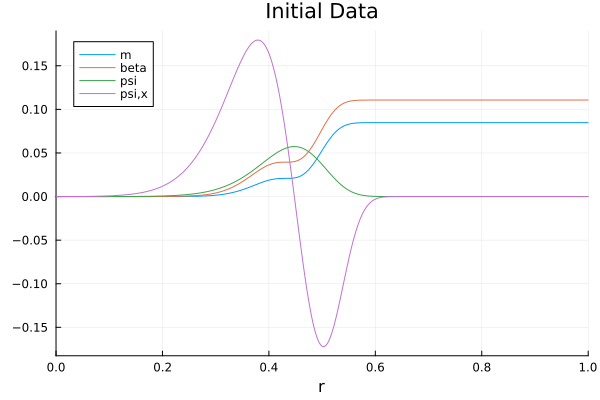

In [13]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [14]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [15]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [16]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.03084271193370367


In [17]:
using Base.Threads
Threads.nthreads()

4

In [18]:
if m==1
    global dt=2e-5
elseif m==2
    global dt=1e-5
else
    global dt=1e-5/2
end

5.0e-6

 ## Time evolution

fixed grid

In [ ]:
finaltime=5.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 500 dt is 5.0e-6, t=0.0024999999999999823 speed is 0.49999614469816706, dx/dt=249.99999999999997


iteration 1000 dt is 5.0e-6, t=0.00499999999999988 speed is 0.49999614469816706, dx/dt=249.99999999999997


iteration 1500 dt is 5.0e-6, t=0.0074999999999997785 speed is 0.49999614469816706, dx/dt=249.99999999999997


iteration 2000 dt is 5.0e-6, t=0.009999999999999678 speed is 0.49999614469816706, dx/dt=249.99999999999997


iteration 2500 dt is 5.0e-6, t=0.012499999999999576 speed is 0.49999614469816706, dx/dt=249.99999999999997


iteration 3000 dt is 5.0e-6, t=0.014999999999999474 speed is 0.49999614469816706, dx/dt=249.99999999999997


iteration 3500 dt is 5.0e-6, t=0.017500000000000022 speed is 0.49999614469816717, dx/dt=249.99999999999997


iteration 4000 dt is 5.0e-6, t=0.020000000000000788 speed is 0.49999614469816717, dx/dt=249.99999999999997


iteration 4500 dt is 5.0e-6, t=0.022500000000001553 speed is 0.49999614469816717, dx/dt=249.99999999999997


iteration 5000 dt



iteration 38500 dt is 5.0e-6, t=0.19250000000012213 speed is 0.49999614469817044, dx/dt=249.99999999999997


iteration 39000 dt is 5.0e-6, t=0.19500000000012463 speed is 0.49999614469817055, dx/dt=249.99999999999997


iteration 39500 dt is 5.0e-6, t=0.19750000000012713 speed is 0.4999961446981708, dx/dt=249.99999999999997


iteration 40000 dt is 5.0e-6, t=0.20000000000012963 speed is 0.4999961446981711, dx/dt=249.99999999999997


iteration 40500 dt is 5.0e-6, t=0.20250000000013213 speed is 0.49999614469817133, dx/dt=249.99999999999997


iteration 41000 dt is 5.0e-6, t=0.20500000000013463 speed is 0.49999614469817155, dx/dt=249.99999999999997


iteration 41500 dt is 5.0e-6, t=0.20750000000013713 speed is 0.4999961446981718, dx/dt=249.99999999999997


iteration 42000 dt is 5.0e-6, t=0.21000000000013963 speed is 0.499996144698172, dx/dt=249.99999999999997


iteration 42500 dt is 5.0e-6, t=0.21250000000014213 speed is 0.49999614469817233, dx/dt=249.99999999999997


iteration 43000 dt is 



iteration 76500 dt is 5.0e-6, t=0.3824999999995766 speed is 0.499996144698272, dx/dt=249.99999999999997


iteration 77000 dt is 5.0e-6, t=0.38499999999956525 speed is 0.4999961446982759, dx/dt=249.99999999999997


iteration 77500 dt is 5.0e-6, t=0.38749999999955387 speed is 0.4999961446982801, dx/dt=249.99999999999997


iteration 78000 dt is 5.0e-6, t=0.3899999999995425 speed is 0.49999614469828435, dx/dt=249.99999999999997


iteration 78500 dt is 5.0e-6, t=0.3924999999995311 speed is 0.4999961446982886, dx/dt=249.99999999999997


iteration 79000 dt is 5.0e-6, t=0.39499999999951974 speed is 0.49999614469829323, dx/dt=249.99999999999997


iteration 79500 dt is 5.0e-6, t=0.39749999999950836 speed is 0.49999614469829784, dx/dt=249.99999999999997


iteration 80000 dt is 5.0e-6, t=0.399999999999497 speed is 0.4999961446983027, dx/dt=249.99999999999997


iteration 80500 dt is 5.0e-6, t=0.4024999999994856 speed is 0.49999614469830767, dx/dt=249.99999999999997


iteration 81000 dt is 5.0e-6,



iteration 114500 dt is 5.0e-6, t=0.5724999999995168 speed is 0.4999961446992897, dx/dt=249.99999999999997


iteration 115000 dt is 5.0e-6, t=0.5749999999995332 speed is 0.4999961446993185, dx/dt=249.99999999999997


iteration 115500 dt is 5.0e-6, t=0.5774999999995496 speed is 0.49999614469934794, dx/dt=249.99999999999997


iteration 116000 dt is 5.0e-6, t=0.579999999999566 speed is 0.49999614469937803, dx/dt=249.99999999999997


iteration 116500 dt is 5.0e-6, t=0.5824999999995824 speed is 0.49999614469940856, dx/dt=249.99999999999997


iteration 117000 dt is 5.0e-6, t=0.5849999999995987 speed is 0.49999614469943987, dx/dt=249.99999999999997


iteration 117500 dt is 5.0e-6, t=0.5874999999996151 speed is 0.4999961446994716, dx/dt=249.99999999999997


iteration 118000 dt is 5.0e-6, t=0.5899999999996315 speed is 0.49999614469950404, dx/dt=249.99999999999997


iteration 118500 dt is 5.0e-6, t=0.5924999999996479 speed is 0.499996144699537, dx/dt=249.99999999999997


iteration 119000 dt is 



iteration 152500 dt is 5.0e-6, t=0.7625000000007616 speed is 0.4999961447033288, dx/dt=249.99999999999997


iteration 153000 dt is 5.0e-6, t=0.765000000000778 speed is 0.4999961447034046, dx/dt=249.99999999999997


iteration 153500 dt is 5.0e-6, t=0.7675000000007943 speed is 0.4999961447034807, dx/dt=249.99999999999997


iteration 154000 dt is 5.0e-6, t=0.7700000000008107 speed is 0.4999961447035573, dx/dt=249.99999999999997


iteration 154500 dt is 5.0e-6, t=0.7725000000008271 speed is 0.49999614470363396, dx/dt=249.99999999999997


iteration 155000 dt is 5.0e-6, t=0.7750000000008435 speed is 0.49999614470371095, dx/dt=249.99999999999997


iteration 155500 dt is 5.0e-6, t=0.7775000000008598 speed is 0.49999614470378817, dx/dt=249.99999999999997


iteration 156000 dt is 5.0e-6, t=0.7800000000008762 speed is 0.49999614470386555, dx/dt=249.99999999999997


iteration 156500 dt is 5.0e-6, t=0.7825000000008926 speed is 0.4999961447039433, dx/dt=249.99999999999997


iteration 157000 dt is 



iteration 190500 dt is 5.0e-6, t=0.9525000000020063 speed is 0.49999614470793163, dx/dt=249.99999999999997


iteration 191000 dt is 5.0e-6, t=0.9550000000020227 speed is 0.4999961447079395, dx/dt=249.99999999999997


iteration 191500 dt is 5.0e-6, t=0.957500000002039 speed is 0.4999961447079451, dx/dt=249.99999999999997


iteration 192000 dt is 5.0e-6, t=0.9600000000020554 speed is 0.49999614470794834, dx/dt=249.99999999999997


iteration 192500 dt is 5.0e-6, t=0.9625000000020718 speed is 0.4999961447079489, dx/dt=249.99999999999997


iteration 193000 dt is 5.0e-6, t=0.9650000000020882 speed is 0.4999961447079469, dx/dt=249.99999999999997


iteration 193500 dt is 5.0e-6, t=0.9675000000021046 speed is 0.4999961447079424, dx/dt=249.99999999999997


iteration 194000 dt is 5.0e-6, t=0.9700000000021209 speed is 0.49999614470793535, dx/dt=249.99999999999997


iteration 194500 dt is 5.0e-6, t=0.9725000000021373 speed is 0.4999961447079256, dx/dt=249.99999999999997


iteration 195000 dt is 5



iteration 228500 dt is 5.0e-6, t=1.142500000003251 speed is 0.49999614470144865, dx/dt=249.99999999999997


iteration 229000 dt is 5.0e-6, t=1.1450000000032674 speed is 0.4999961447013122, dx/dt=249.99999999999997


iteration 229500 dt is 5.0e-6, t=1.1475000000032838 speed is 0.499996144701177, dx/dt=249.99999999999997


iteration 230000 dt is 5.0e-6, t=1.1500000000033002 speed is 0.4999961447010434, dx/dt=249.99999999999997


iteration 230500 dt is 5.0e-6, t=1.1525000000033165 speed is 0.49999614470091125, dx/dt=249.99999999999997


iteration 231000 dt is 5.0e-6, t=1.155000000003333 speed is 0.49999614470078096, dx/dt=249.99999999999997


iteration 231500 dt is 5.0e-6, t=1.1575000000033493 speed is 0.49999614470065257, dx/dt=249.99999999999997


iteration 232000 dt is 5.0e-6, t=1.1600000000033657 speed is 0.4999961447005262, dx/dt=249.99999999999997


iteration 232500 dt is 5.0e-6, t=1.162500000003382 speed is 0.4999961447004022, dx/dt=249.99999999999997


iteration 233000 dt is 5.0



iteration 266500 dt is 5.0e-6, t=1.3325000000044958 speed is 0.4999961447036325, dx/dt=249.99999999999997


iteration 267000 dt is 5.0e-6, t=1.3350000000045121 speed is 0.49999614470389486, dx/dt=249.99999999999997


iteration 267500 dt is 5.0e-6, t=1.3375000000045285 speed is 0.49999614470416326, dx/dt=249.99999999999997


iteration 268000 dt is 5.0e-6, t=1.3400000000045449 speed is 0.4999961447044372, dx/dt=249.99999999999997


iteration 268500 dt is 5.0e-6, t=1.3425000000045613 speed is 0.49999614470471676, dx/dt=249.99999999999997


iteration 269000 dt is 5.0e-6, t=1.3450000000045776 speed is 0.499996144705002, dx/dt=249.99999999999997


iteration 269500 dt is 5.0e-6, t=1.347500000004594 speed is 0.49999614470529263, dx/dt=249.99999999999997


iteration 270000 dt is 5.0e-6, t=1.3500000000046104 speed is 0.4999961447055887, dx/dt=249.99999999999997


iteration 270500 dt is 5.0e-6, t=1.3525000000046268 speed is 0.49999614470589, dx/dt=249.99999999999997


iteration 271000 dt is 5.0



iteration 304500 dt is 5.0e-6, t=1.5225000000057405 speed is 0.4999961447342361, dx/dt=249.99999999999997


iteration 305000 dt is 5.0e-6, t=1.5250000000057569 speed is 0.49999614473470966, dx/dt=249.99999999999997


iteration 305500 dt is 5.0e-6, t=1.5275000000057732 speed is 0.49999614473518333, dx/dt=249.99999999999997


iteration 306000 dt is 5.0e-6, t=1.5300000000057896 speed is 0.49999614473565707, dx/dt=249.99999999999997


iteration 306500 dt is 5.0e-6, t=1.532500000005806 speed is 0.49999614473613063, dx/dt=249.99999999999997


iteration 307000 dt is 5.0e-6, t=1.5350000000058224 speed is 0.4999961447366042, dx/dt=249.99999999999997


iteration 307500 dt is 5.0e-6, t=1.5375000000058388 speed is 0.49999614473707743, dx/dt=249.99999999999997


iteration 308000 dt is 5.0e-6, t=1.5400000000058551 speed is 0.49999614473755055, dx/dt=249.99999999999997


iteration 308500 dt is 5.0e-6, t=1.5425000000058715 speed is 0.49999614473802306, dx/dt=249.99999999999997


iteration 309000 dt 



iteration 342500 dt is 5.0e-6, t=1.7125000000069852 speed is 0.49999614475918225, dx/dt=249.99999999999997


iteration 343000 dt is 5.0e-6, t=1.7150000000070016 speed is 0.49999614475906434, dx/dt=249.99999999999997


iteration 343500 dt is 5.0e-6, t=1.717500000007018 speed is 0.49999614475892235, dx/dt=249.99999999999997


iteration 344000 dt is 5.0e-6, t=1.7200000000070343 speed is 0.4999961447587555, dx/dt=249.99999999999997


iteration 344500 dt is 5.0e-6, t=1.7225000000070507 speed is 0.4999961447585631, dx/dt=249.99999999999997


iteration 345000 dt is 5.0e-6, t=1.725000000007067 speed is 0.4999961447583448, dx/dt=249.99999999999997


iteration 345500 dt is 5.0e-6, t=1.7275000000070835 speed is 0.4999961447581003, dx/dt=249.99999999999997


iteration 346000 dt is 5.0e-6, t=1.7300000000070999 speed is 0.4999961447578284, dx/dt=249.99999999999997


iteration 346500 dt is 5.0e-6, t=1.7325000000071162 speed is 0.49999614475752896, dx/dt=249.99999999999997


iteration 347000 dt is 5



iteration 380500 dt is 5.0e-6, t=1.90250000000823 speed is 0.499996144699006, dx/dt=249.99999999999997


iteration 381000 dt is 5.0e-6, t=1.9050000000082463 speed is 0.4999961446988376, dx/dt=249.99999999999997


iteration 381500 dt is 5.0e-6, t=1.9075000000082627 speed is 0.49999614469872244, dx/dt=249.99999999999997


iteration 382000 dt is 5.0e-6, t=1.910000000008279 speed is 0.49999614469865983, dx/dt=249.99999999999997


iteration 382500 dt is 5.0e-6, t=1.9125000000082955 speed is 0.49999614469864884, dx/dt=249.99999999999997


iteration 383000 dt is 5.0e-6, t=1.9150000000083118 speed is 0.4999961446986883, dx/dt=249.99999999999997


iteration 383500 dt is 5.0e-6, t=1.9175000000083282 speed is 0.4999961446987772, dx/dt=249.99999999999997


iteration 384000 dt is 5.0e-6, t=1.9200000000083446 speed is 0.4999961446989139, dx/dt=249.99999999999997


iteration 384500 dt is 5.0e-6, t=1.922500000008361 speed is 0.49999614469909703, dx/dt=249.99999999999997


iteration 385000 dt is 5.0e

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [48]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step710.csv" is not a valid file or doesn't exist

In [49]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [50]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

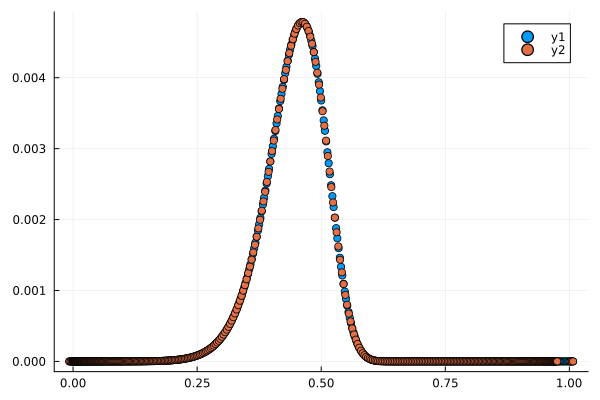

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

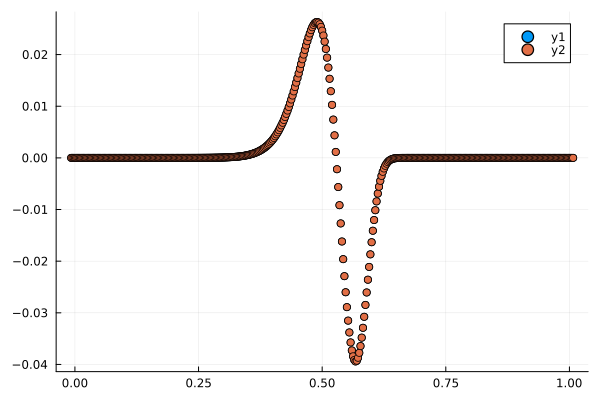

In [417]:
scatter([x1,x1],[y1,y2])